# Load Data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import plotly.express as px
# Load the dataset
df = pd.read_csv("onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [30]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [31]:
# Drop the 'Unnamed: 12' column as it is a duplicate
df = df.drop(columns=['Unnamed: 12'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


# Handle Missing Value


In [32]:
# Null
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

# Mengkodekan Variabel Kategori

In [33]:
# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(df, columns=[
    'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
    'Educational Qualifications', 'Feedback', 'Output'
])

# Display the first few rows of the encoded dataset
data_encoded.head()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Monthly Income_No Income,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Feedback_Negative,Feedback_Positive,Output_No,Output_Yes
0,20,4,12.9766,77.5993,560001,True,False,False,False,True,...,True,False,False,True,False,False,False,True,False,True
1,24,3,12.9770,77.5773,560009,True,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
2,22,3,12.9551,77.6593,560017,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,True
3,22,6,12.9473,77.5616,560019,True,False,False,False,True,...,True,True,False,False,False,False,False,True,False,True
4,22,4,12.9850,77.5533,560010,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,True


# Visualization

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback  
0    Yes   Positive  
1    Yes   Positive  
2    Yes  Negative   
3    Yes   Positive  
4    Yes   Positive  


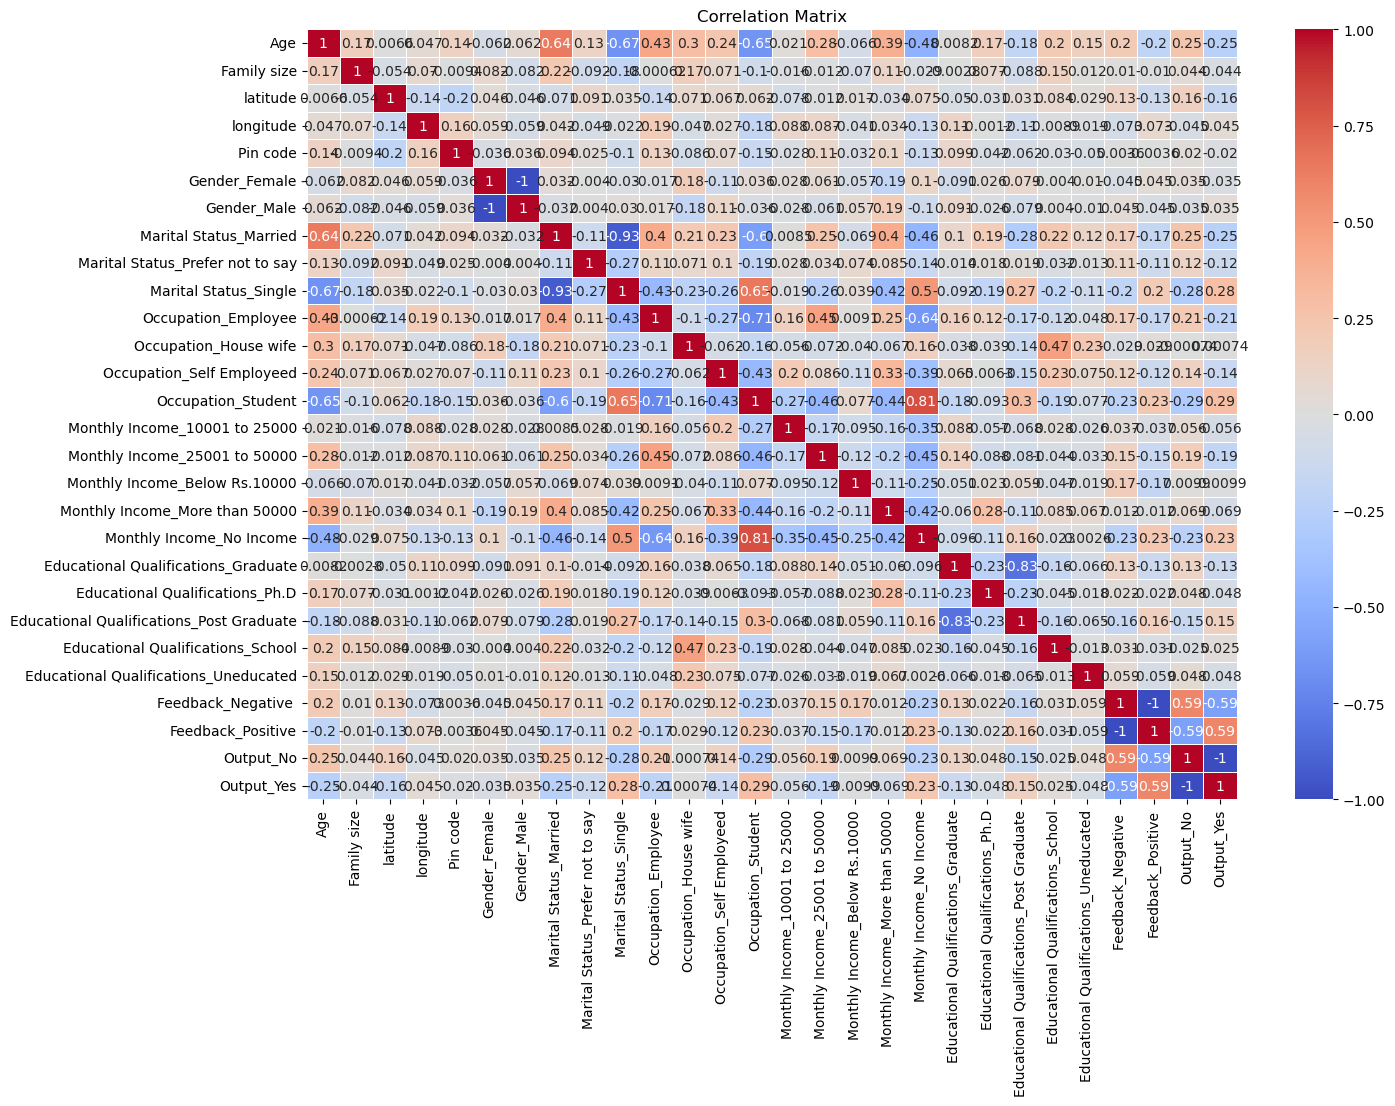

In [34]:
# Display the head of the dataframe
print(df.head())
# Plot correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# EDA Visualization
data_encoded['Age_Group'] = pd.cut(data_encoded['Age'], bins=[0, 20, 25, 30, np.inf], labels=['<20', '21-25','26-30','31>'])
grouped = data_encoded.groupby('Age_Group', observed=False)
fig = px.bar(grouped['Age'].count(), title='Online Food Orders Based On Customers Age Groups')
fig.update_layout(title_x=0.5)
fig.show()


In [36]:
#Pie
fig = px.pie(grouped['Age'].count(),
             values=grouped['Age'].count(),
             names=grouped['Age'].count().index,
             title="Online Food Orders Based on Customers' Age Groups with Percentages")

fig.show()

# Scaling Numerical Features

In [37]:
# Scale numerical features
numeric_cols = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])
data_encoded.head()


,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Feedback_Negative,Feedback_Positive,Output_No,Output_Yes,Age_Group
0,-1.557620,0.532929,0.102224,-0.016759,-1.247274,True,False,False,False,True,...,False,False,True,False,False,False,True,False,True,<20
1,-0.211614,-0.208205,0.111227,-0.445712,-0.992164,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,21-25
2,-0.884617,-0.208205,-0.381663,1.153112,-0.737055,False,True,False,False,True,...,False,False,True,False,False,True,False,False,True,21-25
3,-0.884617,2.015198,-0.557212,-0.751828,-0.673278,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,21-25
4,-0.884617,0.532929,0.291278,-0.913660,-0.960276,False,True,False,False,True,...,False,False,True,False,False,False,True,False,True,21-25


In [38]:
data_encoded = data_encoded.drop(columns=['Age_Group'])
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       388 non-null    float64
 1   Family size                               388 non-null    float64
 2   latitude                                  388 non-null    float64
 3   longitude                                 388 non-null    float64
 4   Pin code                                  388 non-null    float64
 5   Gender_Female                             388 non-null    bool   
 6   Gender_Male                               388 non-null    bool   
 7   Marital Status_Married                    388 non-null    bool   
 8   Marital Status_Prefer not to say          388 non-null    bool   
 9   Marital Status_Single                     388 non-null    bool   
 10  Occupation_Employee                   

# Split Data

In [39]:
# Define features and target variable
X = data_encoded.drop(columns=['Output_No', 'Output_Yes'])
y = data_encoded['Output_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train models
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Calculate metrics
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

metrics_svm = evaluate_model(y_test, y_pred_svm)
metrics_dt = evaluate_model(y_test, y_pred_dt)
metrics_rf = evaluate_model(y_test, y_pred_rf)

# Print metrics
print(f"SVM - Accuracy: {metrics_svm[0]}, Precision: {metrics_svm[1]}, Recall: {metrics_svm[2]}, F1-Score: {metrics_svm[3]}")
print(f"Decision Tree - Accuracy: {metrics_dt[0]}, Precision: {metrics_dt[1]}, Recall: {metrics_dt[2]}, F1-Score: {metrics_dt[3]}")
print(f"Random Forest - Accuracy: {metrics_rf[0]}, Precision: {metrics_rf[1]}, Recall: {metrics_rf[2]}, F1-Score: {metrics_rf[3]}")


SVM - Accuracy: 0.8717948717948718, Precision: 0.9117647058823529, Recall: 0.9393939393939394, F1-Score: 0.9253731343283583
Decision Tree - Accuracy: 0.8717948717948718, Precision: 0.9375, Recall: 0.9090909090909091, F1-Score: 0.923076923076923
Random Forest - Accuracy: 0.8974358974358975, Precision: 0.9264705882352942, Recall: 0.9545454545454546, F1-Score: 0.9402985074626866


In [44]:
# Print metrics
print(f"SVM - MAE: {metrics_svm[0]}, MSE: {metrics_svm[1]}, RMSE: {metrics_svm[2]}, R²: {metrics_svm[3]}")
print(f"Decision Tree - MAE: {metrics_dt[0]}, MSE: {metrics_dt[1]}, RMSE: {metrics_dt[2]}, R²: {metrics_dt[3]}")
print(f"Random Forest - MAE: {metrics_rf[0]}, MSE: {metrics_rf[1]}, RMSE: {metrics_rf[2]}, R²: {metrics_rf[3]}")



SVM - MAE: 0.8717948717948718, MSE: 0.9117647058823529, RMSE: 0.9393939393939394, R²: 0.9253731343283583
Decision Tree - MAE: 0.8717948717948718, MSE: 0.9375, RMSE: 0.9090909090909091, R²: 0.923076923076923
Random Forest - MAE: 0.8974358974358975, MSE: 0.9264705882352942, RMSE: 0.9545454545454546, R²: 0.9402985074626866
